In [42]:
import os
import sys

import librosa
import psycopg2
import numpy as np
import pandas as pd
import librosa.display
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from psycopg2.extras import DictCursor

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.fetch_data import fetch_coughs_from_db

load_dotenv()

DB_CREDENTIALS = {
    'user': os.environ['PGUSER'],
    'password': os.environ['PGPASSWORD'],
    'host': os.environ['PGHOST'],
    'database': os.environ['PGDATABASE']
}

In [87]:
BASE_PATH = "../data"

with psycopg2.connect(**DB_CREDENTIALS, cursor_factory=DictCursor) as conn:
    coughs = fetch_coughs_from_db(conn)

for c in coughs:
    f = f"{BASE_PATH}/{c['filename']}"
    c['filenames'] = []

    # NOTE: hackily check if we have segments
    for i in range(1, 6):
        curr = f"{f.replace('.wav', '')}_cut00{i}.wav"
        if os.path.isfile(curr):
            c['filenames'].append(curr)

    if len(c['filenames']) < 1:
        c['filenames'].append(f)

../data/../data/coughs/25d6eb37-4c9e-4f3c-a4be-4052a55c3d94_cut001.wav


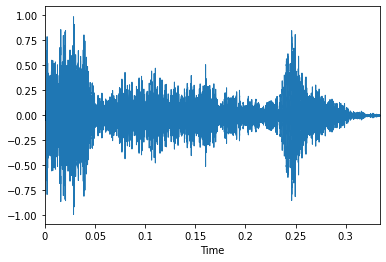

In [135]:
filename = f"../data/{coughs[22]['filenames'][0]}"
print(filename)

y, sr = librosa.load(f"{filename}")
ycut, _ = librosa.effects.trim(y)
librosa.display.waveplot(y, sr=sr)

../data/../data/coughs/25d6eb37-4c9e-4f3c-a4be-4052a55c3d94_cut001.wav


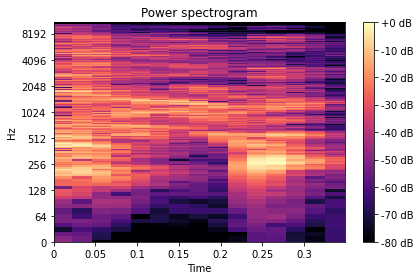

In [136]:
filename = f"../data/{coughs[22]['filenames'][0]}"
print(filename)
x, sr = librosa.load(f"{filename}")

x_stft = librosa.stft(x)

librosa.display.specshow(librosa.amplitude_to_db(x_stft, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()